__author__ = 'Ricardo Pasquini'

# Ejemplo Georeferenciación guiada por poligonos de barrios 

En esta version se le pasa al script de geocodificacion para que busque cerca del centroide del barrio .

Realiza tambien una medida de la distancia al centroide, para tener una idea de tolerancia. 


In [35]:
from shapely import wkt
import geopandas as gpd
import pandas as pd
import os
import inspect

# 1. Levanto los poligonos de barrios y las direcciones 

In [2]:
# En un primer paso se levanta la base con los poligonos de los barrios.
# Luego voy a hacer un join con el archivo de direcciones orginales, actualmente en la base de datos mongo
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
print(currentdir)
filename = "Direcciones.xlsx" 
df=pd.read_excel(currentdir+'\\datos_vivienda_social\\barrios_santiago\\'+filename)


C:\Users\Richard\Dropbox\projects\vivienda


In [7]:
# la variable index se mapea con el orden en el archivo orignal
df[df['index']==0]

,DIRECCION,Barrio normalizado,Ciudad,BASE,ID BASE,LAT_CENTROIDE,LONG_CENTROIDE,WKT_POLYGON,DNI_TITULA,index,...,raw.exte_1,raw.exte_2,raw.exte_3,raw.featur,raw.feat_1,raw.feat_2,raw.feat_3,raw.name,score,status
2969,C/ 16 Y 103 Nº 407 Bº BORGES 154971383,CORONEL BORGES,SANTIAGO DEL ESTERO,barrios wikimapia,60.0,-27.767398,-64.29505,Polygon ((-64.30834462594341971 -27.7725944918...,27933562,0,...,-64.266617,-27.777507,-27.779507,StreetAddress,96.3,-64.265617,-27.778507,"Borges 407, Santiago del Estero, G4200, Santia...",96.3,OK


Asigno el index original, lo pongo en formato string para que matchee luego con el otro dataframe

In [69]:
df.index=df['index'].astype(str)

In [51]:
#levanto el dataframe que contiene las direcciones originales. De aqui me sirve la direccion sin barrio que ya arregle previamente
import pickle
def levantardf():
    currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
    pickle_in=open(currentdir+'\\dataframes\\demanda_santiago_original.pickle', 'rb')
    df = pickle.load(pickle_in)
    return df
df0=levantardf()

In [55]:
df0.columns

Index(['id_persona ', ' QID  ', ' BASE  ', ' CORTE  ', ' CUIT  ', ' TDOC  ',
       'DNI_TITULAR', ' SEXO  ', ' DENO  ', ' FNAC  ', ' MONTO  ', ' PROV  ',
       ' PERIODO  ', ' PERIODO_BASE  ', ' PERIODO_ACT  ', ' BASE_PROV  ',
       ' PASAPORTE  ', ' LEGAJO  ', ' APELLIDO_ORIG  ', ' NOMBRE_ORIG  ',
       'DIRECCION', ' NDOC_ORIG  ', ' INGRESOS_1  ', ' DISC  ', ' F_INSCR  ',
       ' ULT_ACT  ', ' EX_COMB  ', ' PAREJA  ', ' DOC  ', ' RELACION  ',
       ' HIJ  ', ' FECHA_SINTYS ', 'grado_confiab', 'Unnamed: 33',
       'id_persona', 'cuit', 'tdoc', 'ndoc', 'deno', 'sexo', 'fnac',
       'grado_confiab.1', 'Barrio', 'DIRECCIONsinBarrio'],
      dtype='object')

In [73]:
df=df[['DIRECCION', 'Barrio normalizado', 'Ciudad', 'BASE', 'ID BASE',
       'LAT_CENTROIDE', 'LONG_CENTROIDE', 'WKT_POLYGON']].join(df0[['DIRECCIONsinBarrio']])

In [82]:
df

,DIRECCION,Barrio normalizado,Ciudad,BASE,ID BASE,LAT_CENTROIDE,LONG_CENTROIDE,WKT_POLYGON,DIRECCIONsinBarrio
index,,,,,,,,,
2722,C/100 S/Nº Bº B0SCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,CALLE 100 S/Nº
6511,C/426 S/N Bº BOACO II,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,CALLE 426 S/N
7735,C/ 435 S/N Bº BOSCO 3,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,CALLE 435 S/N
44,PJE. 159 Y CANDELARIA S/N Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,PJE. 159 Y CANDELARIA S/N
317,PJE Nº 436 S/N Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,PJE Nº 436 S/N
478,FORMOSA Y CALLE 434 Nº 1631 Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,FORMOSA Y CALLE 434 Nº 1631
902,CALLE 228 S/N PJE. SIN SALIDA Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,CALLE 228 S/N PJE. SIN SALIDA
984,FORMOSA Nº 1451 Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,FORMOSA Nº 1451
1069,C/437 Nº 322 Bº BOSCO III,BOSCO III,SANTIAGO DEL ESTERO,barrios populares,3528.0,-27.790959,-64.290405,Polygon ((-64.29498999999999853 -27.7901769999...,CALLE 437 Nº 322


In [83]:
df['proximity']="["+df['LAT_CENTROIDE'].astype('str')+","+df['LONG_CENTROIDE'].astype('str')+"]"

In [11]:
df.columns

Index(['DIRECCION', 'Barrio normalizado', 'Ciudad', 'BASE', 'ID BASE',
       'LAT_CENTROIDE', 'LONG_CENTROIDE', 'WKT_POLYGON', 'DNI_TITULA', 'index',
       'id', 'address', 'bbox.north', 'bbox.south', 'confidence', 'lat', 'lng',
       'ok', 'quality', 'raw.extent', 'raw.exte_1', 'raw.exte_2', 'raw.exte_3',
       'raw.featur', 'raw.feat_1', 'raw.feat_2', 'raw.feat_3', 'raw.name',
       'score', 'status'],
      dtype='object')

In [84]:
# Me quedo solo con las observaciones que tienen  barrios
df_con_barrio=df[df['WKT_POLYGON'].isnull()==False]

In [85]:
df_con_barrio['Coordinates']=df_con_barrio['WKT_POLYGON'].apply(wkt.loads)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
gdf_con_barrio = gpd.GeoDataFrame(df_con_barrio, geometry='Coordinates',crs={'init':'epsg:4326'})

Ejemplo ploteo de los barrios

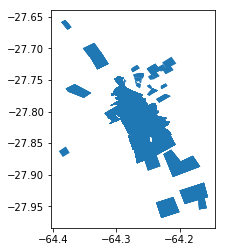

In [147]:
gdf_con_barrio.plot() 

In [14]:
df['Ciudad'].unique()

array(['SANTIAGO DEL ESTERO', 'LA BANDA', 'EL DEAN', 'EL DEANCITO',
       'EL MAQUITO', 'EL PUESTITO', 'EL PUESTITO SAN ANTONIO',
       'LOS CARDOZOS', 'MACO', 'PAMPA MUYOJ', 'SAN PEDRO', 'SANTA MARIA',
       'VUELTA DE LA BARRANCA', 'YANDA', 'ZANJON', nan], dtype=object)

# Loop del Proceso de georeferenciacion

In [89]:
import geocoder

In [91]:
from itertools import islice
LIMIT = 4
# iterrows and unpacking
for index, row in islice(gdf_con_barrio.iterrows(), LIMIT):
#for index, row in df.iterrows():
        print(index)
        addressstring=row['DIRECCIONsinBarrio']+", BARRIO "+row['Barrio normalizado']+', Santiago del Estero'
        print(addressstring)
        geocoderesults=geocoder.arcgis(addressstring, proximity=row['proximity'])
        print({'id':index,'geocoderesults':geocoderesults.json})
        #Activar la siguiente linea para guardar en la base de datos
        #db.santiago.insert({'id':index,'DNI_TITULAR':row['DNI_TITULAR'],'geocoderesults':geocoderesults.json})

2722
CALLE 100 S/Nº , BARRIO BOSCO III, Santiago del Estero
{'id': '2722', 'geocoderesults': {'address': 'Calle 100, Santiago del Estero, G4200, Santiago del Estero', 'bbox': {'northeast': [-27.761182845626195, -64.29183641018237], 'southwest': [-27.763182845626197, -64.29383641018238]}, 'confidence': 9, 'lat': -27.762182845626196, 'lng': -64.29283641018237, 'ok': True, 'quality': 'StreetName', 'raw': {'name': 'Calle 100, Santiago del Estero, G4200, Santiago del Estero', 'extent': {'xmin': -64.29383641018238, 'ymin': -27.763182845626197, 'xmax': -64.29183641018237, 'ymax': -27.761182845626195}, 'feature': {'geometry': {'x': -64.29283641018237, 'y': -27.762182845626196}, 'attributes': {'Score': 90.83, 'Addr_Type': 'StreetName'}}}, 'score': 90.83, 'status': 'OK'}}
6511
CALLE 426 S/N , BARRIO BOSCO III, Santiago del Estero
{'id': '6511', 'geocoderesults': {'address': 'Tercero, Santiago del Estero, G4200, Santiago del Estero', 'bbox': {'northeast': [-27.802238856207065, -64.28895728278104]

Prueba de lo que hago con cada direccion

In [148]:
from shapely.geometry import Point
lat=geocoderesults.json['lat']
lng=geocoderesults.json['lng']
#geometry = [Point(xy) for xy in zip(cities['longitude'], cities['latitude'])]
point=Point(lng,lat)
fake=pd.DataFrame(
    {'hola':[1], 'lat':lat, 'lng':lng})
geometry = [Point(xy) for xy in zip(fake['lng'], fake['lat'])]
pointgpd=gpd.GeoDataFrame(fake,geometry=geometry,crs={'init':'epsg:4326'})
#pointgdf = geopandas.GeoDataFrame( df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

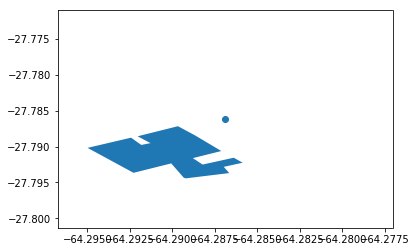

In [149]:
import matplotlib.pyplot as plt
fig, myax = plt.subplots()
pointgpd.plot(ax=myax)
gdf_con_barrio[gdf_con_barrio.index=='44'].plot(ax=myax)

In [141]:
plt.show()

# Cae dentro del barrio?

In [150]:
geom=gdf_con_barrio[gdf_con_barrio.index=='44']
geom2=geom.geometry.values[0]
geom2
point.within(geom2)

False

In [144]:
crs={'proj': 'tmerc', 'lat_0': -34.6297166, 'lon_0': -58.4627, 'k': 0.999998, 'x_0': 100000, 'y_0': 100000, 'ellps': 'intl', 'units': 'm', 'no_defs': True}

# Distancia?

In [151]:
point.distance(geom2)

0.0027982542592202174

In [154]:
pointgpd2=pointgpd.to_crs(crs)
geom2=geom.to_crs(crs)

In [155]:
distance=pointgpd2.geometry[0].distance(geom2.geometry.values[0])

288.64762794199913